In [8]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import xarray as xr
import shapely.geometry as geometry
import pylab as pl
import numpy as np
from scipy.spatial import Delaunay
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

from concave_hull import concave_hull, concave_hull_indexes
from tqdm import tqdm


from scripts.find_largest_islands import *
from scripts.open_preprocess_racmo import *
!ls "/Volumes/imau01/rapid/RACMO2.3p2/FGRN055"

ModuleNotFoundError: No module named 'find_largest_islands'

# Example shape

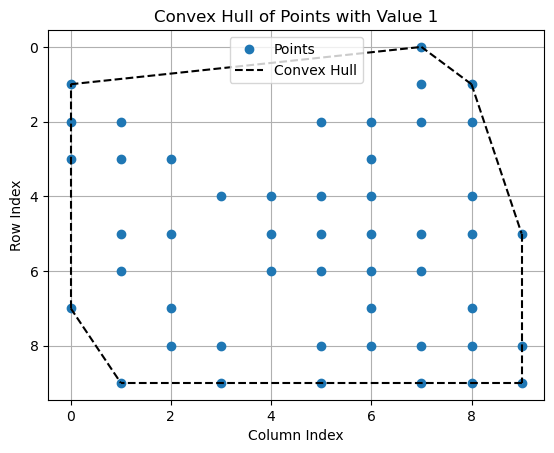

In [31]:


np.random.seed(13)
points = np.random.randint(2, size=(10, 10))
data = np.array(points)

# Convert the array to an xarray DataArray
da = xr.DataArray(data)

# Get the coordinates of points where the value is 1
coords = np.argwhere(da.values == 1)

# Compute the convex hull of the coordinates
hull = ConvexHull(coords)

# Plot the points and the convex hull
plt.plot(coords[:, 1], coords[:, 0], 'o', label='Points')
for simplex in hull.simplices:
    plt.plot(coords[simplex, 1], coords[simplex, 0], 'k--')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Convex Hull of Points with Value 1')
plt.gca().invert_yaxis()  # Invert y-axis to match typical array orientation
plt.legend(['Points', 'Convex Hull'], loc='upper center')
plt.grid(True)
plt.show()


In [32]:


# Create a Shapely MultiPoint object
point_collection = geometry.MultiPoint(coords)
point_collection.convex_hull

points = coords

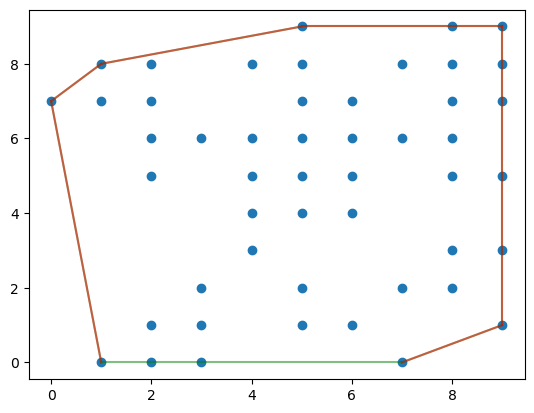

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

from concave_hull import concave_hull, concave_hull_indexes


convex_hull = ConvexHull(points[:, :2]) 
plt.plot(points[:, 0], points[:, 1], "o")
for simplex in convex_hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "g-", alpha=0.5)

idxes = concave_hull_indexes(
    points[:, :2],
    length_threshold=50,
)
# you can get coordinates by `points[idxes]`
assert np.all(points[idxes] == concave_hull(points, length_threshold=50))

for f, t in zip(idxes[:-1], idxes[1:]):  # noqa
    seg = points[[f, t]]
    plt.plot(seg[:, 0], seg[:, 1], "r-", alpha=0.5)
plt.show()


# other shape - with concave hull

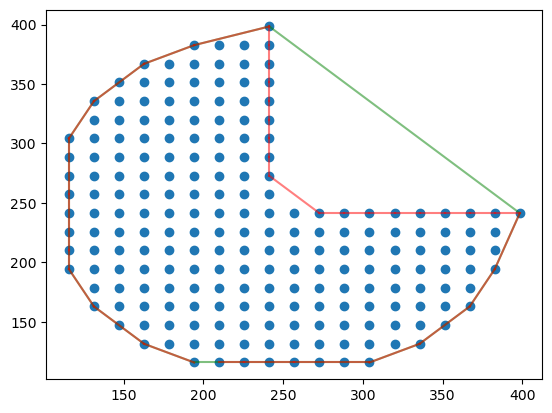

In [62]:


points = []
c = np.array([250, 250])
for x in np.arange(100, 400, 5 * np.pi):
    for y in np.arange(100, 400, 5 * np.pi):
        if x > c[0] and y > c[1]:
            continue
        r = np.linalg.norm(c - [x, y])
        if r > 150:
            continue
        points.append([x, y])
points = np.array(points)
convex_hull = ConvexHull(points[:, :2])  # it's already N-by-2, I'm just emphasizing

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

plt.plot(points[:, 0], points[:, 1], "o")
for simplex in convex_hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "g-", alpha=0.5)

idxes = concave_hull_indexes(
    points[:, :2],
    length_threshold=50,
)
# you can get coordinates by `points[idxes]`
assert np.all(points[idxes] == concave_hull(points, length_threshold=50))

for f, t in zip(idxes[:-1], idxes[1:]):  # noqa
    seg = points[[f, t]]
    plt.plot(seg[:, 0], seg[:, 1], "r-", alpha=0.5)
# plt.savefig('hull.png')
plt.show()


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:01<00:00, 363.49it/s] 


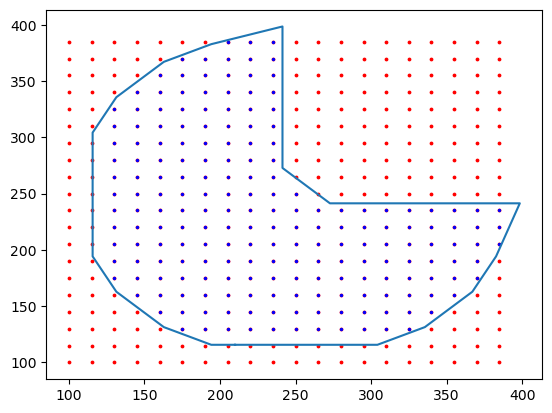

In [64]:
# Create a Shapely MultiPoint object
point_collection = geometry.MultiPoint(points)
# now make a polygonf from points[idxes]
polygon = geometry.Polygon(points[idxes])


# Plot the point_collection and polygon
plt.plot(*polygon.exterior.xy)
x,y = np.meshgrid(np.arange(100, 400, 15), np.arange(100, 400, 15))
x, y = x.flatten(), y.flatten()
all_points = np.vstack((x,y)).T
plt.scatter(all_points[:,0], all_points[:,1], c='red', s=3)
for i in tqdm(np.arange(len(x))):
    point = geometry.Point(x[i], y[i])
    if polygon.contains(point):
        plt.scatter(x[i], y[i], c='blue', s=2)



# Greenland shapem

In [6]:
masks1k = open_mask_1k()

In [13]:
masks1k

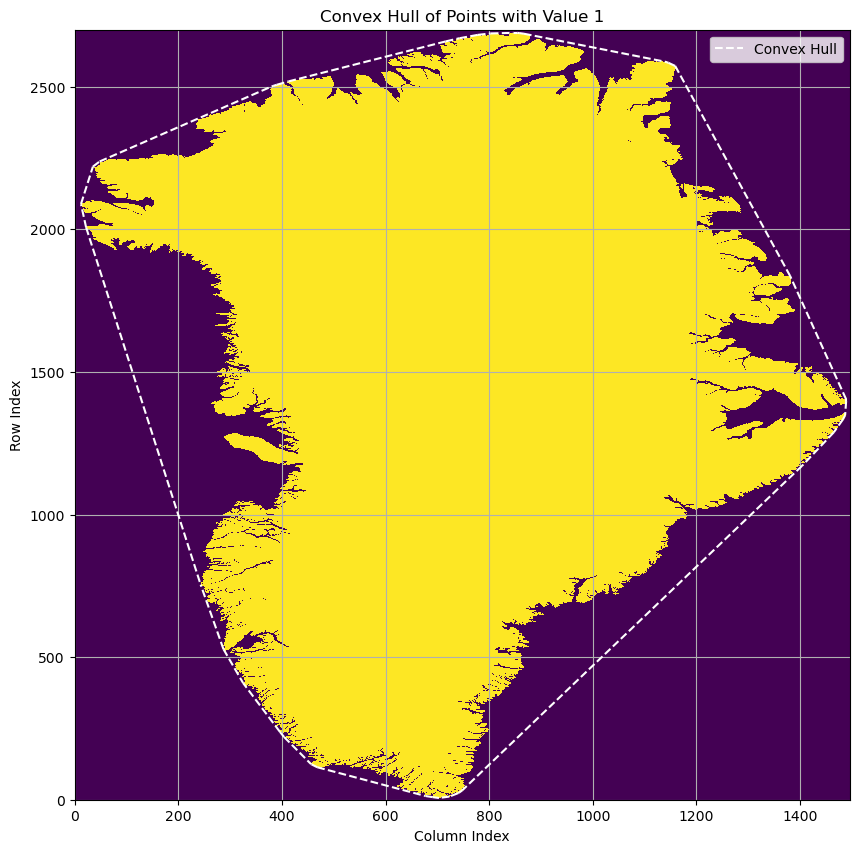

In [7]:
da = masks1k['LSM_no_islands']

# Get the coordinates of points where the value is 1
coords = np.argwhere(da.values == 1)

# Compute the convex hull of the coordinates
hull = ConvexHull(coords)

fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolorfast(da.values)
# Plot the points and the convex hull
# plt.plot(coords[:, 1], coords[:, 0], 'o', label='Points', markersize=1)
for simplex in hull.simplices:
    plt.plot(coords[simplex, 1], coords[simplex, 0], 'w--')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Convex Hull of Points with Value 1')
# plt.gca().invert_yaxis()  # Invert y-axis to match typical array orientation
plt.legend([ 'Convex Hull'], loc='upper right')
plt.grid(True)
plt.show()


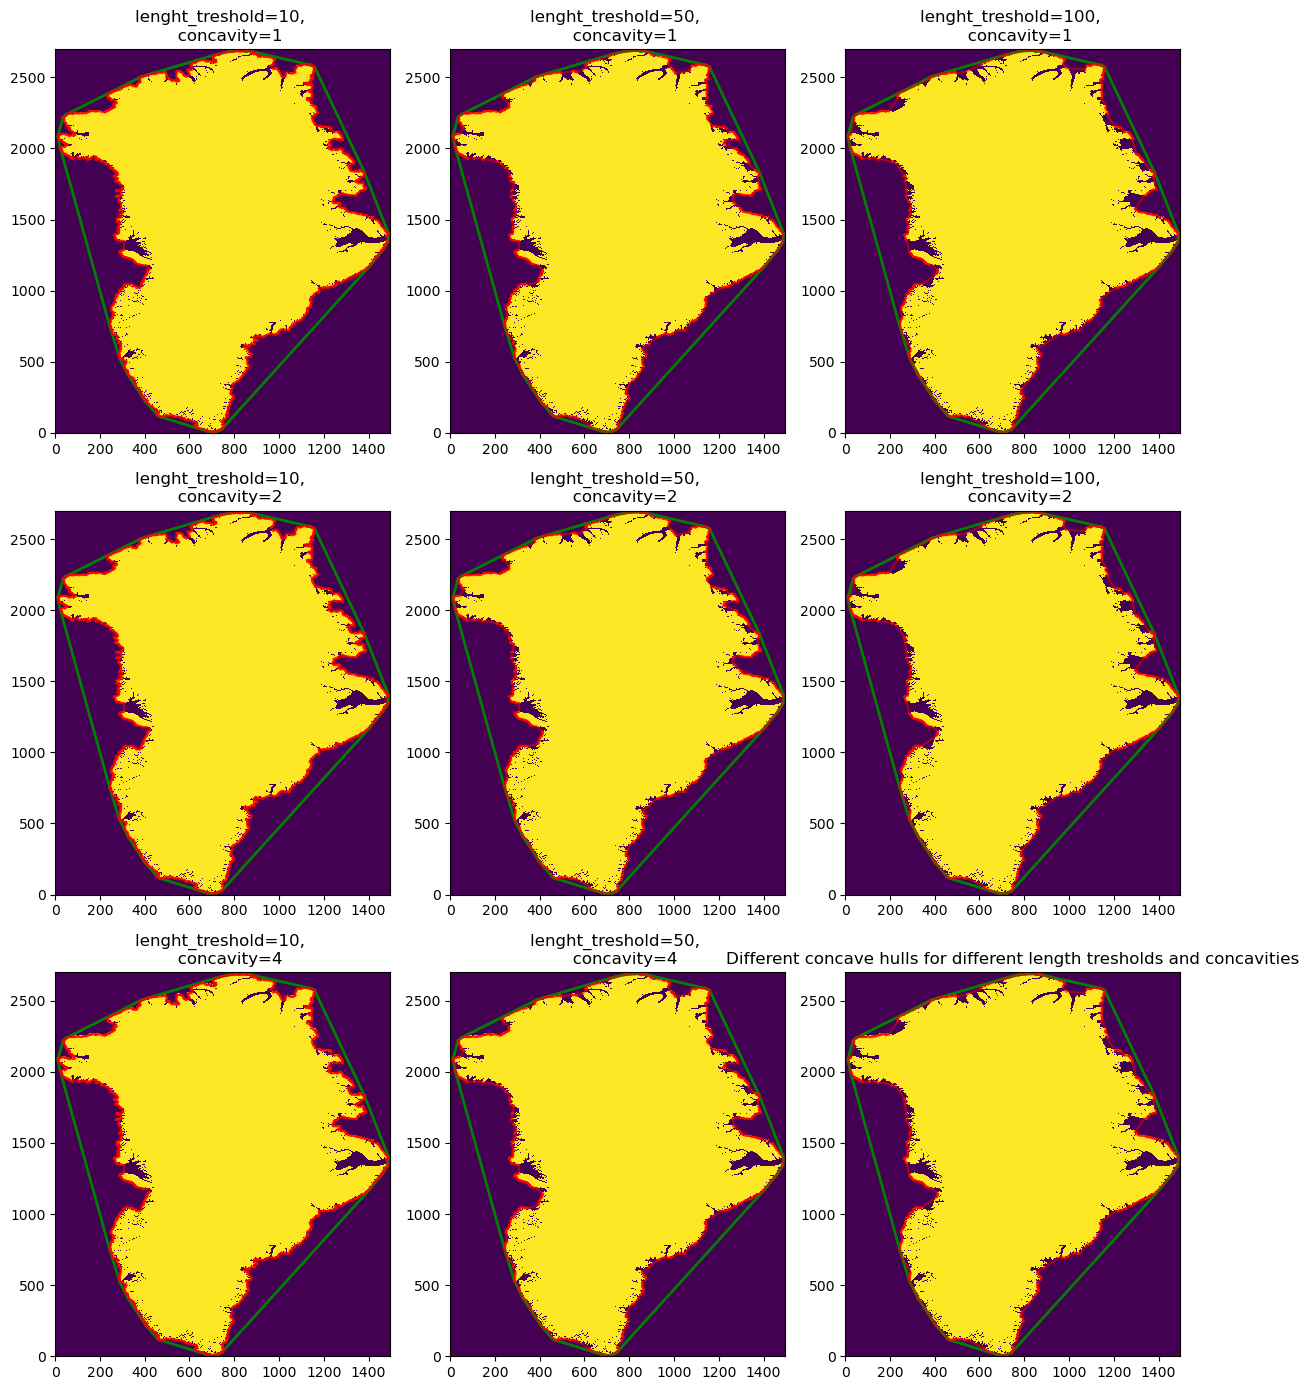

In [11]:
# da = masks1k['LSM_no_islands']#.sel(x=slice(1000, 2500), y=slice(1000, 3500))
# # now only select where x <600 and y <1000
# coords = np.argwhere(da.values == 1)
# points = coords
# # transpose points

# convex_hull = ConvexHull(points[:, :2]) 


# fig, axs = plt.subplots(3,3, figsize=(12, 14))

# for j, concavity in enumerate([1, 2, 4]):
#     for i, length_treshold in enumerate([10, 50, 100]):
#         ax = axs[j, i]
#         ax.pcolorfast(da.values)
#         ax.title.set_text(f'lenght_treshold={length_treshold}, \n   concavity={concavity}')

#         for simplex in convex_hull.simplices:
#             ax.plot(points[simplex, 1], points[simplex, 0], "g-",  linewidth=2)

#         idxes = concave_hull_indexes(
#             points[:, :2],
#             length_threshold=length_treshold,
#         )
#         # you can get coordinates by `points[idxes]`
#         assert np.all(points[idxes] == concave_hull(points, length_threshold=length_treshold))

#         for f, t in zip(idxes[:-1], idxes[1:]):  # noqa
#             seg = points[[f, t]]
#             ax.plot(seg[:, 1], seg[:, 0], "r-", alpha=0.5)
# plt.tight_layout()
# plt.title("Different concave hulls for different length tresholds and concavities")
# plt.savefig("../../results/figures/method/concave_hull_parameter_whole_greenland.png")


In [130]:
masks1k = open_mask_1k()
da = masks1k['LSM_no_islands'][::5, ::5]
coords = np.argwhere(da.values == 1)
points = coords

concavity = 1
length_treshold =  10
ax.pcolorfast(da.values)
ax.title.set_text(f'lenght_treshold={length_treshold}, \n   concavity={concavity}')

for simplex in convex_hull.simplices:
    ax.plot(points[simplex, 1], points[simplex, 0], "g-",  linewidth=2)

idxes = concave_hull_indexes(
    points[:, :2],
    length_threshold=length_treshold,
    concavity=concavity
)
# you can get coordinates by `points[idxes]`

for f, t in tqdm(zip(idxes[:-1], idxes[1:])):  # noqa
    seg = points[[f, t]]
    ax.plot(seg[:, 1], seg[:, 0], "r-", alpha=0.5)



668it [00:00, 2850.57it/s]


In [131]:
points_in_polygon = []

polygon = geometry.Polygon(points[idxes])

mask_greenland_boundary= np.zeros_like(da.values)

x,y = np.meshgrid(np.arange(len(da.x)), np.arange(len(da.y)))
y,x  = x.flatten(), y.flatten()
for i in tqdm(np.arange(len(x))):
    point = geometry.Point(x[i], y[i])
    if polygon.contains(point):
        points_in_polygon.append([x[i], y[i]])
        mask_greenland_boundary[int(x[i]), int(y[i])] = 1



100%|██████████| 162000/162000 [00:19<00:00, 8518.99it/s]


In [154]:
ds = da.to_dataset(name='one_island')
ds['fjords'] = da.copy(deep=True) 
ds['fjords'].values = mask_greenland_boundary - ds['one_island'].values
ds['fjords'].values = ds['fjords'].values.clip(min=0)
# also only make 1 where masks1k['LSM'] is 0
# invert LSM to make it 1 where there is no land
ds['ocean'] = da.copy(deep=True)
ds['ocean'].values = 1 - masks1k['LSM'].values[::5, ::5]
ds['fjords'] = ds['fjords']*ds['ocean']



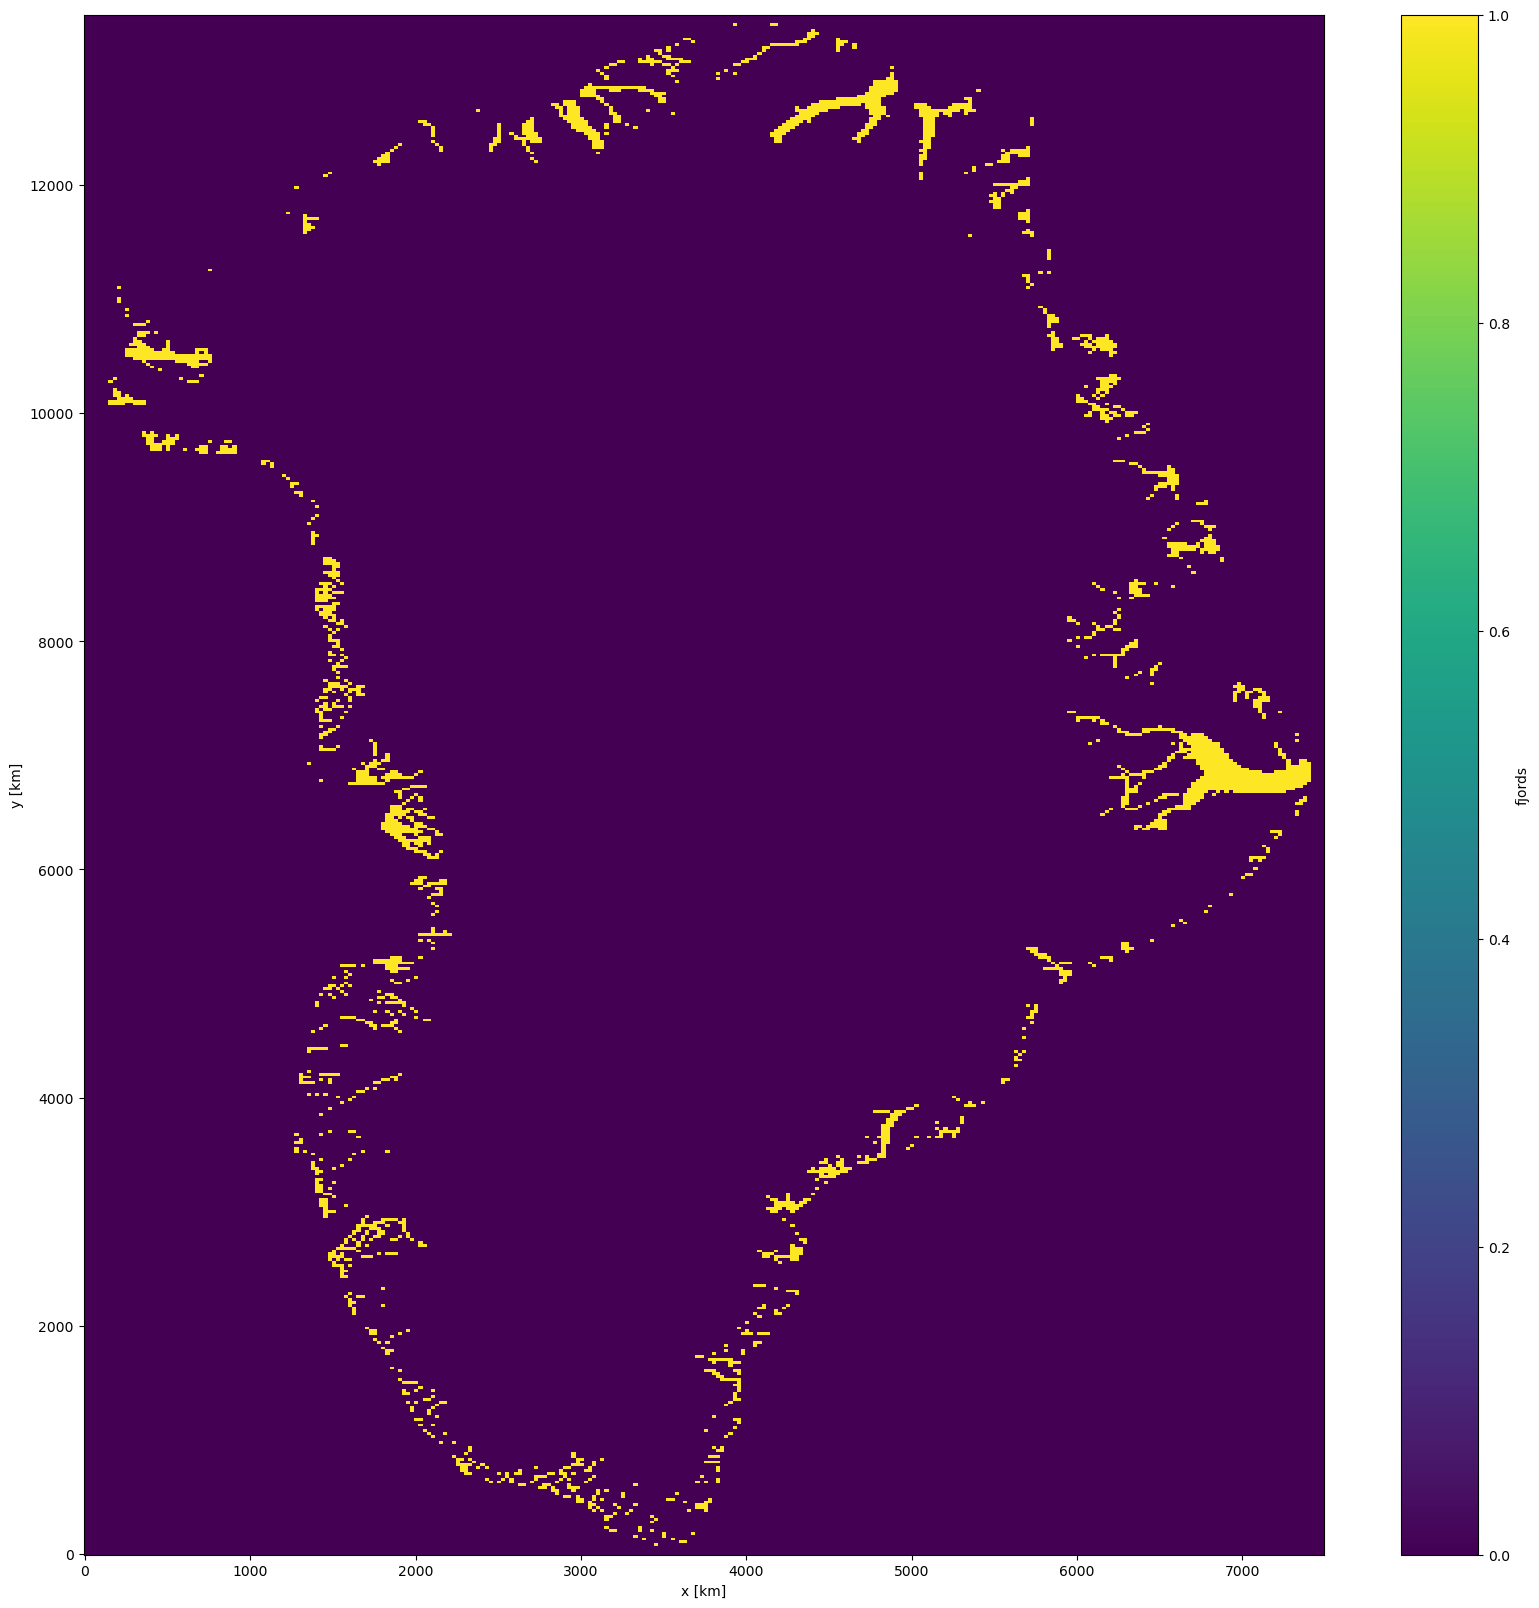

In [155]:
fig = plt.figure(figsize=(20, 20))
ds['fjords'].plot()


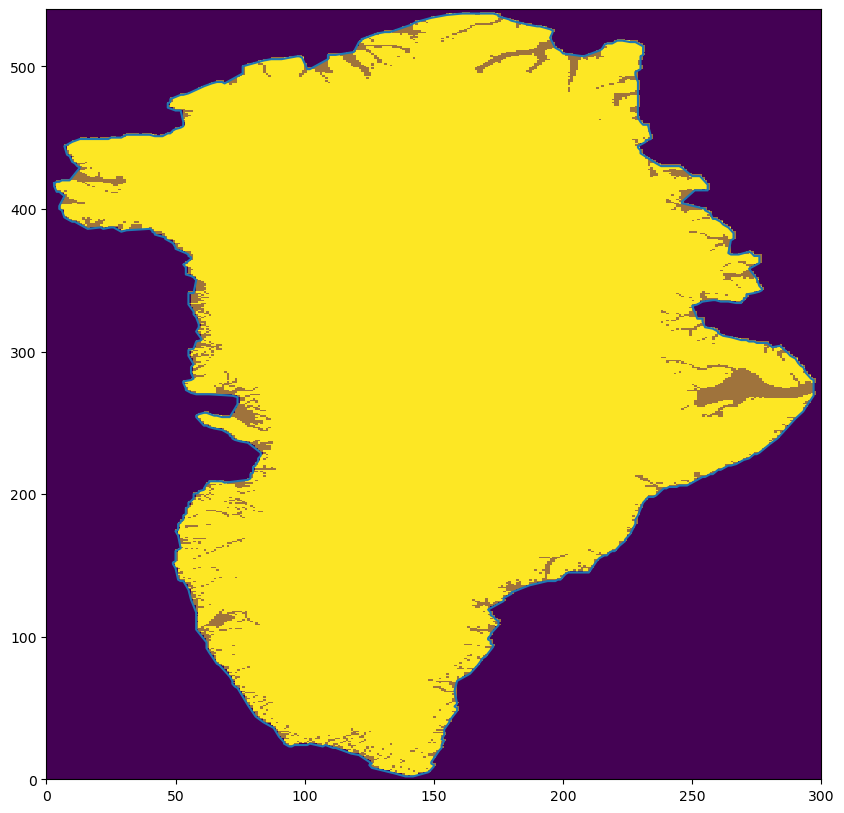

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolorfast(da.values)
ax.pcolorfast(mask_greenland_boundary, alpha=0.5)
y, x = polygon.exterior.xy
ax.plot(x, y)

# Find max island

In [31]:
import numpy as np

def largest_islands(grid):
    def dfs(row, col):
        stack = [(row, col)]
        island_coords = []  # List to store island coordinates
        size = 0
        while stack:
            r, c = stack.pop()
            if 0 <= r < rows and 0 <= c < cols and grid[r][c] == 1 and not visited[r][c]:
                visited[r][c] = True
                island_coords.append([r, c])  # Add current coordinate to island_coords
                size += 1
                for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    stack.append((r + dr, c + dc))
        return size, island_coords

    rows, cols = len(grid), len(grid[0])
    visited = [[False] * cols for _ in range(rows)]
    max_size = 0
    max_island_coords = []
    second_max_size = 0
    second_max_island_coords = []

    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1 and not visited[i][j]:
                island_size, island_coords = dfs(i, j)
                if island_size > max_size:
                    second_max_size = max_size
                    second_max_island_coords = max_island_coords
                    max_size = island_size
                    max_island_coords = island_coords
                elif island_size > second_max_size:
                    second_max_size = island_size
                    second_max_island_coords = island_coords

    return max_size, np.array(max_island_coords), second_max_size, np.array(second_max_island_coords)



In [32]:
grid = masks1k['LSM'].values
max_size, max_island_coords, second_max_size, second_max_island_coords = largest_islands(grid)
max_island_coords = np.array(max_island_coords)
print("Largest island size:", max_size)
print("Coordinates of the largest island:", max_island_coords)

masks1k['LSM_no_islands'] = masks1k['LSM'].copy(deep=True)
array_no_islands = np.zeros_like(masks1k['LSM'].values)
array_no_islands[max_island_coords[:, 0], max_island_coords[:, 1]] = 1
masks1k['LSM_no_islands'].values = array_no_islands

array_disko = np.zeros_like(masks1k['LSM'].values)
array_disko[second_max_island_coords[:, 0], second_max_island_coords[:, 1]] = 1
masks1k['LSM_Qeqertarsuaq'] = masks1k['LSM'].copy(deep=True)
masks1k['LSM_Qeqertarsuaq'].values = array_disko


Largest island size: 2135510
Coordinates of the largest island: [[  6 703]
 [  7 703]
 [  7 704]
 ...
 [ 10 711]
 [  9 710]
 [  8 705]]


In [7]:
# make a path for one directory up
import os
os.path.abspath(os.path.join(os.getcwd(), os.pardir))

!ls "../../results/figures/method/"


concave_hull_parameter_space_nuuk_area.png
concave_hull_parameter_whole_greenland.png
find_largest_island.png


In [ ]:
# in array_disko replace 0 with nan
array_disko[array_disko == 0] = np.nan

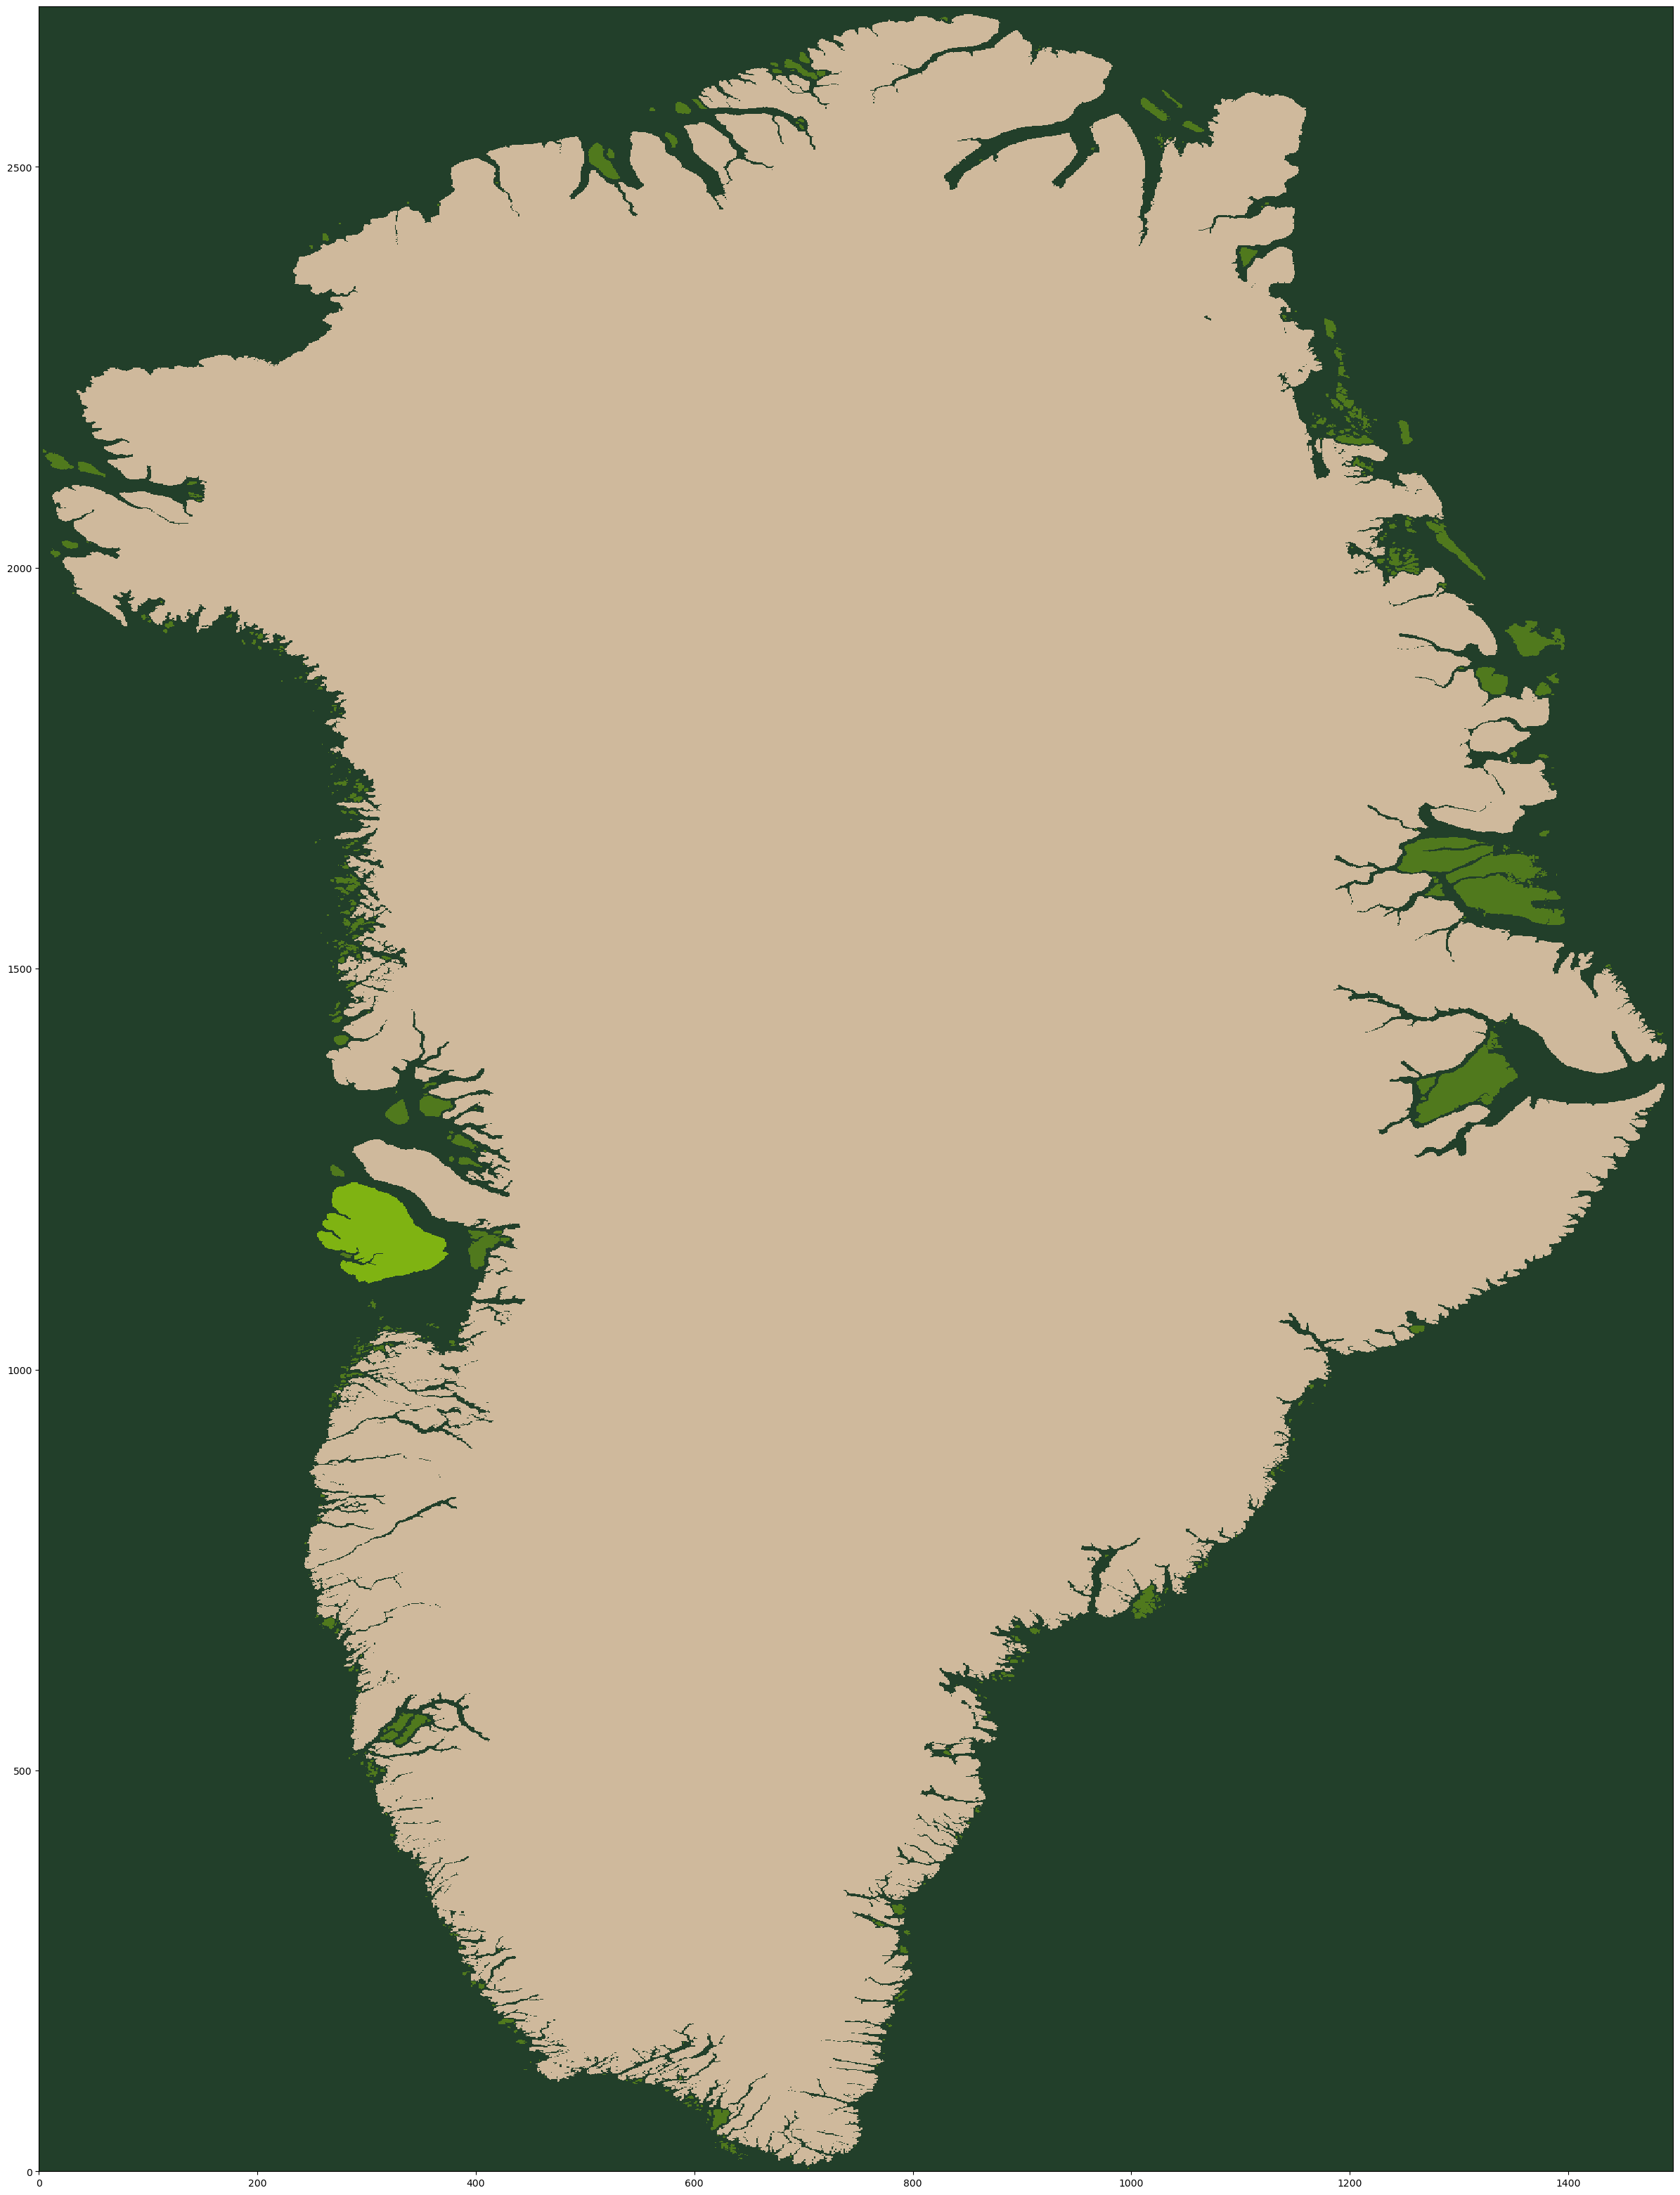

In [37]:
fig, ax = plt.subplots(figsize=(30, 40))

ax.pcolorfast(masks1k['LSM'].values)
ax.pcolorfast(array_disko, alpha=0.5, cmap='viridis')
ax.pcolorfast(masks1k['LSM_no_islands'].values, alpha=0.5, cmap='ocean')
# only plot where array disko is not nan, with 
# plt.plot(max_island_coords[:, 1], max_island_coords[:, 0], 'o', label='Points', markersize=1)
plt.savefig("../../results/figures/method/find_largest_island.png")


In [27]:
points[simplex_int, 0]

IndexError: index 731 is out of bounds for axis 0 with size 218

In [156]:
from scripts.scrape_wikipedia_coordinates import greenland_fjords_coordinates, greenland_fjords

In [168]:
greenland_fjords.values()



,url
Main page,https://en.wikipedia.org/wiki/Main_Page
Contents,https://en.wikipedia.org/wiki/Wikipedia:Contents
Current events,https://en.wikipedia.org/wiki/Portal:Current_e...
Random article,https://en.wikipedia.org/wiki/Special:Random
About Wikipedia,https://en.wikipedia.org/wiki/Wikipedia:About
...,...
Privacy policy,https://foundation.wikimedia.org/wiki/Special:...
Disclaimers,https://en.wikipedia.org/wiki/Wikipedia:Genera...
Contact Wikipedia,https://en.wikipedia.org/wiki/Wikipedia:Contac...
Code of Conduct,https://foundation.wikimedia.org/wiki/Special:...


In [186]:
df = pd.DataFrame(index=greenland_fjords.keys())
df['url'] = greenland_fjords.values()
dfcoords = pd.DataFrame(index=greenland_fjords_coordinates.keys())
dfcoords['coords'] = greenland_fjords_coordinates.values()
dfcoords
# now join the two dataframes based on the index
df = pd.merge(df, dfcoords, left_index=True, right_index=True)
df

,url,coords
North Atlantic,https://en.wikipedia.org/wiki/North_Atlantic,"(0°N, 25°W)"
Ammassalik Fjord,https://en.wikipedia.org/wiki/Ammassalik_Fjord,"(65°50′N, 37°3′W)"
Ilulissat Icefjord,https://en.wikipedia.org/wiki/Ilulissat_Icefjord,"(69°08′N, 49°30′W)"
Isortoq Fjord,https://en.wikipedia.org/wiki/Isortoq_Fjord,"(65°28′N, 52°10′W)"
Kaiser Franz Joseph Fjord,https://en.wikipedia.org/wiki/Kaiser_Franz_Jos...,"(73°27′N, 25°00′W)"
...,...,...
Seal Lake,https://en.wikipedia.org/wiki/Seal_Lake,"(77°8′N, 21°0′W)"
Ammassalik wooden maps,https://en.wikipedia.org/wiki/Ammassalik_woode...,"(66°N, 36°W)"
Northern Greenland,https://en.wikipedia.org/wiki/Greenland,"(72°00′N, 40°00′W)"
Northeastern Greenland,https://en.wikipedia.org/wiki/Greenland,"(72°00′N, 40°00′W)"


In [1]:
import pandas as pd
df = pd.read_csv("/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/greenland_fjords.csv")


/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_20138/3829720908.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df

,Unnamed: 0,url,coords,lat,lon,lat_dd,lon_dd
0,North Atlantic,https://en.wikipedia.org/wiki/North_Atlantic,"('0°N', '25°W')",0°N,25°W,0.0,-25.0
1,Ammassalik Fjord,https://en.wikipedia.org/wiki/Ammassalik_Fjord,"('65°50′N', '37°3′W')",65°50′N,37°3′W,65.0,37.0
2,Ilulissat Icefjord,https://en.wikipedia.org/wiki/Ilulissat_Icefjord,"('69°08′N', '49°30′W')",69°08′N,49°30′W,69.0,49.0
3,Isortoq Fjord,https://en.wikipedia.org/wiki/Isortoq_Fjord,"('65°28′N', '52°10′W')",65°28′N,52°10′W,65.0,52.0
4,Kaiser Franz Joseph Fjord,https://en.wikipedia.org/wiki/Kaiser_Franz_Jos...,"('73°27′N', '25°00′W')",73°27′N,25°00′W,73.0,25.0
...,...,...,...,...,...,...,...
163,Seal Lake,https://en.wikipedia.org/wiki/Seal_Lake,"('77°8′N', '21°0′W')",77°8′N,21°0′W,77.0,21.0
164,Ammassalik wooden maps,https://en.wikipedia.org/wiki/Ammassalik_woode...,"('66°N', '36°W')",66°N,36°W,66.0,-36.0
165,Northern Greenland,https://en.wikipedia.org/wiki/Greenland,"('72°00′N', '40°00′W')",72°00′N,40°00′W,72.0,40.0
166,Northeastern Greenland,https://en.wikipedia.org/wiki/Greenland,"('72°00′N', '40°00′W')",72°00′N,40°00′W,72.0,40.0


In [9]:
import pandas as pd
import re

# Function to convert DMS to decimal degrees
def dms_to_dd(dms):
    minutes = 0
    seconds = 0
    try: 
        degrees, minutes, seconds, direction = re.split('[°\'"′″]+', dms)
        print(degrees, minutes, seconds, direction)
    except:
        try:
            degrees, minutes, direction = re.split('[°\'"′″]+', dms)
            print(degrees, minutes, direction)
        except:
            degrees, direction = re.split('[°\'"′″]+', dms)
            print(degrees, direction)
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60)
    if direction in ('S','W'):
        dd*= -1
    return dd

# Apply the function to the 'lat' column
# df['lat_dd'] = df['lat'].apply(dms_to_dd)
df['lon_dd'] = df['lon'].apply(dms_to_dd)
df

25 W
37 3 W
49 30 W
52 10 W
25 00 W
40 00 W
48 15 W
53 15 W
42 46 W
42 46 W
20 47 49 W
21 45 W
51 58 W
42 48 W
42 48 W
42 48 W
41 10 W
21 10 W
63 5 W
68 31 W
22 24 W
65 0 W
26 20 W
66 46 W
18 0 W
19 0 0 W
54 55 W
22 49 W
72 35 W
31 15 W
41 17 W
21 30 W
70 1 W
40 36 W
25 30 W
21 8 10 W
40 18 W
42 36 W
51 10 W
46 21 W
46 21 W
34 28 W
39 38 W
52 50 W
17 50 W
43 4 W
38 17 W
53 03 W
42 59 W
56 27 W
53 30 W
51 31 37 W
42 46 W
43 5 W
52 7 W
32 26 W
55 19 W
55 48 W
52 20 W
36 16 W
35 46 W
53 40 W
41 46 W
29 6 W
24 44 W
42 54 W
42 54 W
20 45.4 W
20 37 W
43 40 W
43 40 W
43 40 W
70 0 W
20 59 21 W
29 53 W
43 15 W
42 35 W
56 05 W
43 3 W
58 0 W
21 00 W
53 10 W
51 23 W
56 30 W
43 0 W
51 19 W
61 30 W
42 0 W
37 52 W
52 6 W
42 37 W
70 44 W
44 47 W
53 15 00 W
55 08 W
44 47 W
51 5 W
45 35 W
34 55 W
55 25 W
53 00 W
68 38 15 W
22 0 W
24 48.5 W
22 20.09 W
20 24 W
21 11 W
28 00 W
29 58 W
67 48 W
66 30 W
67 34 W
24 0 W
24 15 W
26 28 W
24 15 W
23 10 W
32 26 W
32 26 W
24 00 W
25 24 W
25 50 W
26 57 W
25 0 W
23 7 

,Unnamed: 0,url,coords,lat,lon,lat_dd,lon_dd
0,North Atlantic,https://en.wikipedia.org/wiki/North_Atlantic,"('0°N', '25°W')",0°N,25°W,0.0,-25.000000
1,Ammassalik Fjord,https://en.wikipedia.org/wiki/Ammassalik_Fjord,"('65°50′N', '37°3′W')",65°50′N,37°3′W,65.0,-37.050000
2,Ilulissat Icefjord,https://en.wikipedia.org/wiki/Ilulissat_Icefjord,"('69°08′N', '49°30′W')",69°08′N,49°30′W,69.0,-49.500000
3,Isortoq Fjord,https://en.wikipedia.org/wiki/Isortoq_Fjord,"('65°28′N', '52°10′W')",65°28′N,52°10′W,65.0,-52.166667
4,Kaiser Franz Joseph Fjord,https://en.wikipedia.org/wiki/Kaiser_Franz_Jos...,"('73°27′N', '25°00′W')",73°27′N,25°00′W,73.0,-25.000000
...,...,...,...,...,...,...,...
163,Seal Lake,https://en.wikipedia.org/wiki/Seal_Lake,"('77°8′N', '21°0′W')",77°8′N,21°0′W,77.0,-21.000000
164,Ammassalik wooden maps,https://en.wikipedia.org/wiki/Ammassalik_woode...,"('66°N', '36°W')",66°N,36°W,66.0,-36.000000
165,Northern Greenland,https://en.wikipedia.org/wiki/Greenland,"('72°00′N', '40°00′W')",72°00′N,40°00′W,72.0,-40.000000
166,Northeastern Greenland,https://en.wikipedia.org/wiki/Greenland,"('72°00′N', '40°00′W')",72°00′N,40°00′W,72.0,-40.000000


In [2]:
from scripts.open_preprocess_racmo import *
!
masks1k = open_mask_1k()

Pathdata: /Volumes/imau01/rapid/RACMO2.3p2/FGRN055


OSError: no files to open

In [3]:
ds_no_islands = xr.open_dataset('/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/Mask_1km_largest_islands.nc')
ds_no_islands

<xarray.Dataset> Size: 32MB
Dimensions:           (y: 2700, x: 1496)
Coordinates:
  * x                 (x) float32 6kB 5.0 10.0 15.0 ... 7.475e+03 7.48e+03
  * y                 (y) float32 11kB 5.0 10.0 15.0 ... 1.35e+04 1.35e+04
Data variables:
    LSM_no_islands    (y, x) float32 16MB ...
    LSM_Qeqertarsuaq  (y, x) float32 16MB ...
Attributes:
    title:                      Daily Surface mass balance field (RACMO2.3)
    institution:                ULg (Xavier Fettweis)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    history:                    Mon Aug 10 13:33:00 2020: ncks -v Easting,Nor...
    netcdf:                     4.3.2 of Jan  5 2015 11:27:10 $
    NCO:                        netCDF Operators version 4.8.0 (Homepage = ht...
    history_of_appended_files:  Mon Aug 10 13:33:00 2020: Appended file GIMP_...

# Qeqertarsuaq

In [4]:
dsqq = xr.open_dataset('/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/' + 'fjords_Qeqertarsuaq.nc')
dsqq

<xarray.Dataset> Size: 32MB
Dimensions:              (x: 1496, y: 2700)
Coordinates:
  * x                    (x) float32 6kB 5.0 10.0 15.0 ... 7.475e+03 7.48e+03
  * y                    (y) float32 11kB 5.0 10.0 15.0 ... 1.35e+04 1.35e+04
Data variables:
    fjords_Qeqertarsuaq  (y, x) float64 32MB ...

In [6]:
ds_no_islands = xr.open_dataset('/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/Mask_1km_largest_islands.nc')
masks1k = xr.open_dataset('/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc')
masks1k['LSM_no_islands'] = masks1k['LSM'].copy(data=ds_no_islands['LSM_no_islands'].values)
masks1k['LSM_Qeqertarsuaq'] = masks1k['LSM_no_islands'].copy(data=ds_no_islands['LSM_Qeqertarsuaq'].values)
# masks1k = open_mask_1k()

In [12]:


import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import xarray as xr
import shapely.geometry as geometry
import pylab as pl
import numpy as np
from scipy.spatial import Delaunay
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull


da = masks1k['LSM_Qeqertarsuaq']
coords = np.argwhere(da.values == 1)
points = coords

print("Finding edge points")
idxes = concave_hull_indexes(
    points[:, :2],
    length_threshold=10,
    concavity=2
)

print("Checking which points are inside the polygon")
# Now check which points are inside the polygon
points_in_polygon = []
polygon = geometry.Polygon(points[idxes])

Finding edge points
Checking which points are inside the polygon


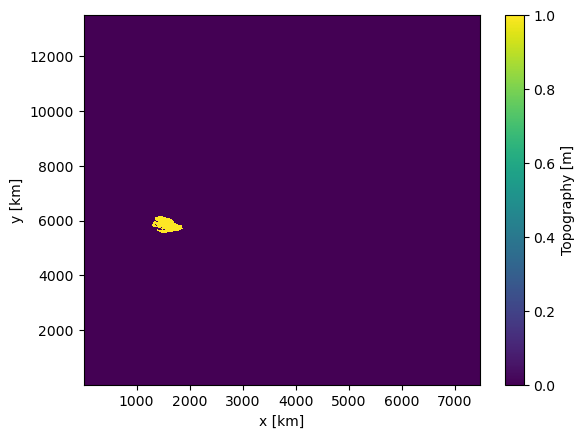

In [14]:
da.plot()

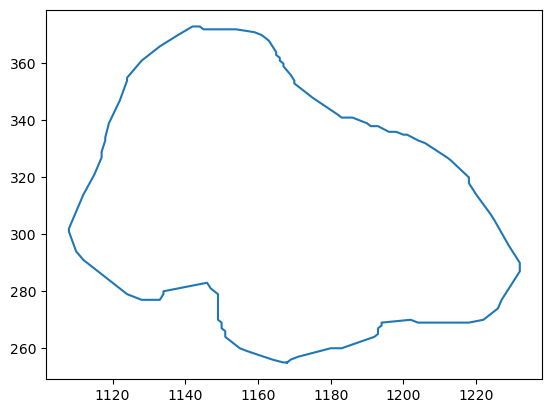

In [17]:

x,y = polygon.exterior.xy
plt.plot(x,y)

In [18]:
mask_boundary= np.zeros_like(da.values)
x,y = np.meshgrid(np.arange(len(da.x)), np.arange(len(da.y)))
y,x  = x.flatten(), y.flatten()
for i in tqdm(np.arange(len(x))):
    point = geometry.Point(x[i], y[i])
    if polygon.contains(point):
        points_in_polygon.append([x[i], y[i]])
        mask_boundary[int(x[i]), int(y[i])] = 1

# fill na in da

fjords_grid_Qeqertarsuaq = mask_boundary - masks1k['LSM_Qeqertarsuaq'].values



100%|██████████| 4039200/4039200 [01:29<00:00, 44995.47it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:
masks1k['fjords_Qeqertarsuaq'] = da.copy(data=fjords_grid_Qeqertarsuaq)
# clip 0 values
masks1k['fjords_Qeqertarsuaq'].values = masks1k['fjords_Qeqertarsuaq'].values.clip(min=0)

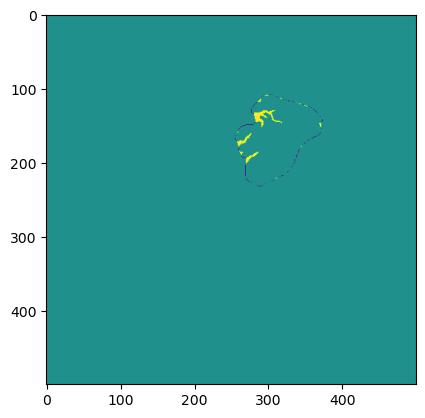

In [31]:
plt.imshow(fjords_grid_Qeqertarsuaq[1000:1500, :500])

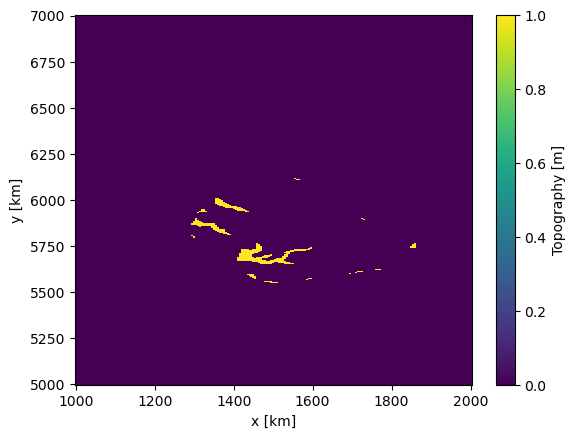

In [38]:
masks1k['fjords_Qeqertarsuaq'].sel(x=slice(1000, 2000), y=slice(5000, 7000)).plot()
masks1k['fjords_Qeqertarsuaq'] = masks1k['fjords_Qeqertarsuaq'].fillna(0)



# Including islands

In [39]:
ds_fjord_incl_islands = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/fjords_incl_islands.nc")
ds_fjord_incl_islands

<xarray.Dataset> Size: 16MB
Dimensions:              (x: 1496, y: 2700)
Coordinates:
  * x                    (x) float32 6kB 5.0 10.0 15.0 ... 7.475e+03 7.48e+03
  * y                    (y) float32 11kB 5.0 10.0 15.0 ... 1.35e+04 1.35e+04
Data variables:
    fjords_incl_islands  (y, x) float32 16MB ...

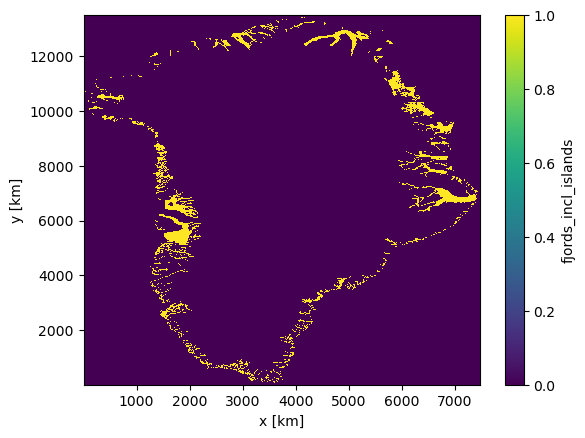

In [40]:
ds_fjord_incl_islands.fjords_incl_islands.plot()

In [43]:
ds_masks1k = xr.open_dataset("/Users/annek/Downloads/masks1k.nc")


In [46]:
ds_fjord_incl_islands.fjords_incl_islands.sum()/ ds_masks1k.fjords.sum()

<xarray.DataArray ()> Size: 8B
array(1.86467712)

In [113]:
# print both sums
print(f"When including islands fjords cover {ds_fjord_incl_islands.fjords_incl_islands.sum().values/1000:.0f} thousand km2")
print(f"When excluding islands fjords cover {ds_masks1k.fjords.sum().values/1000:.0f} thousand km2")

When including islands fjords cover 140 thousand km2
When excluding islands fjords cover 75 thousand km2


87% more if incl. disko bay

In [48]:
sections = xr.open_dataset("/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/adjusted_section_numbers_slater.nc")

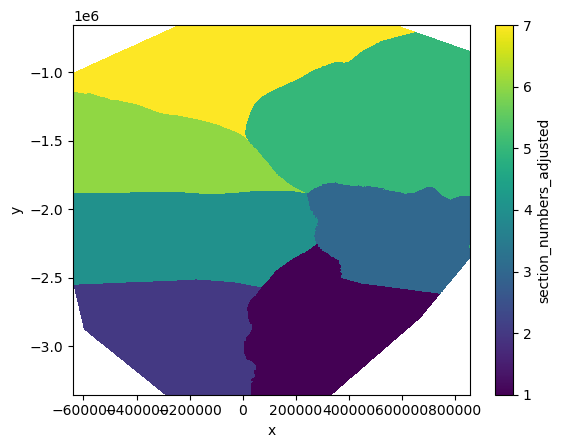

In [52]:
sections.section_numbers_adjusted.plot()

In [63]:
ds_combi = sections.copy(deep=True)
ds_combi['fjords_incl_islands'] = sections.section_numbers_adjusted.copy(data = ds_fjord_incl_islands['fjords_incl_islands'].values)
ds_combi['fjords'] = sections.section_numbers_adjusted.copy(data = ds_masks1k['fjords'].values)

In [67]:
ds_combi_grouped = ds_combi.groupby('section_numbers_adjusted').sum()
df_combi_grouped = ds_combi_grouped[['fjords_incl_islands', 'fjords']].to_dataframe()
# df_combi_grouped.to_csv("/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/fjords_incl_islands_how_many_cells_km.csv")


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4743: UserWarning: No index created for dimension section_numbers_adjusted because variable section_numbers_adjusted is not a coordinate. To create an index for section_numbers_adjusted, please first call `.set_coords('section_numbers_adjusted')` on this object.
  warnings.warn(


In [73]:
((df_combi_grouped.T/df_combi_grouped.fjords).T).round(2)

,fjords_incl_islands,fjords
section_numbers_adjusted,,
1.0,1.58,1.0
2.0,1.58,1.0
3.0,1.07,1.0
4.0,1.89,1.0
5.0,2.60,1.0
6.0,2.77,1.0
7.0,2.22,1.0


In [74]:
# ((df_combi_grouped.T/df_combi_grouped.fjords).T).round(2).to_csv("/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/fjords_incl_islands_how_many_cells_km_percent.csv")


In [79]:
ds_combi['fjords_incl_islands']

<xarray.DataArray 'fjords_incl_islands' (y: 2700, x: 1496)> Size: 16MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * y        (y) float32 11kB -3.355e+06 -3.354e+06 ... -6.566e+05 -6.556e+05
  * x        (x) float32 6kB -6.39e+05 -6.38e+05 -6.37e+05 ... 8.55e+05 8.56e+05

# Plot different island sizes 

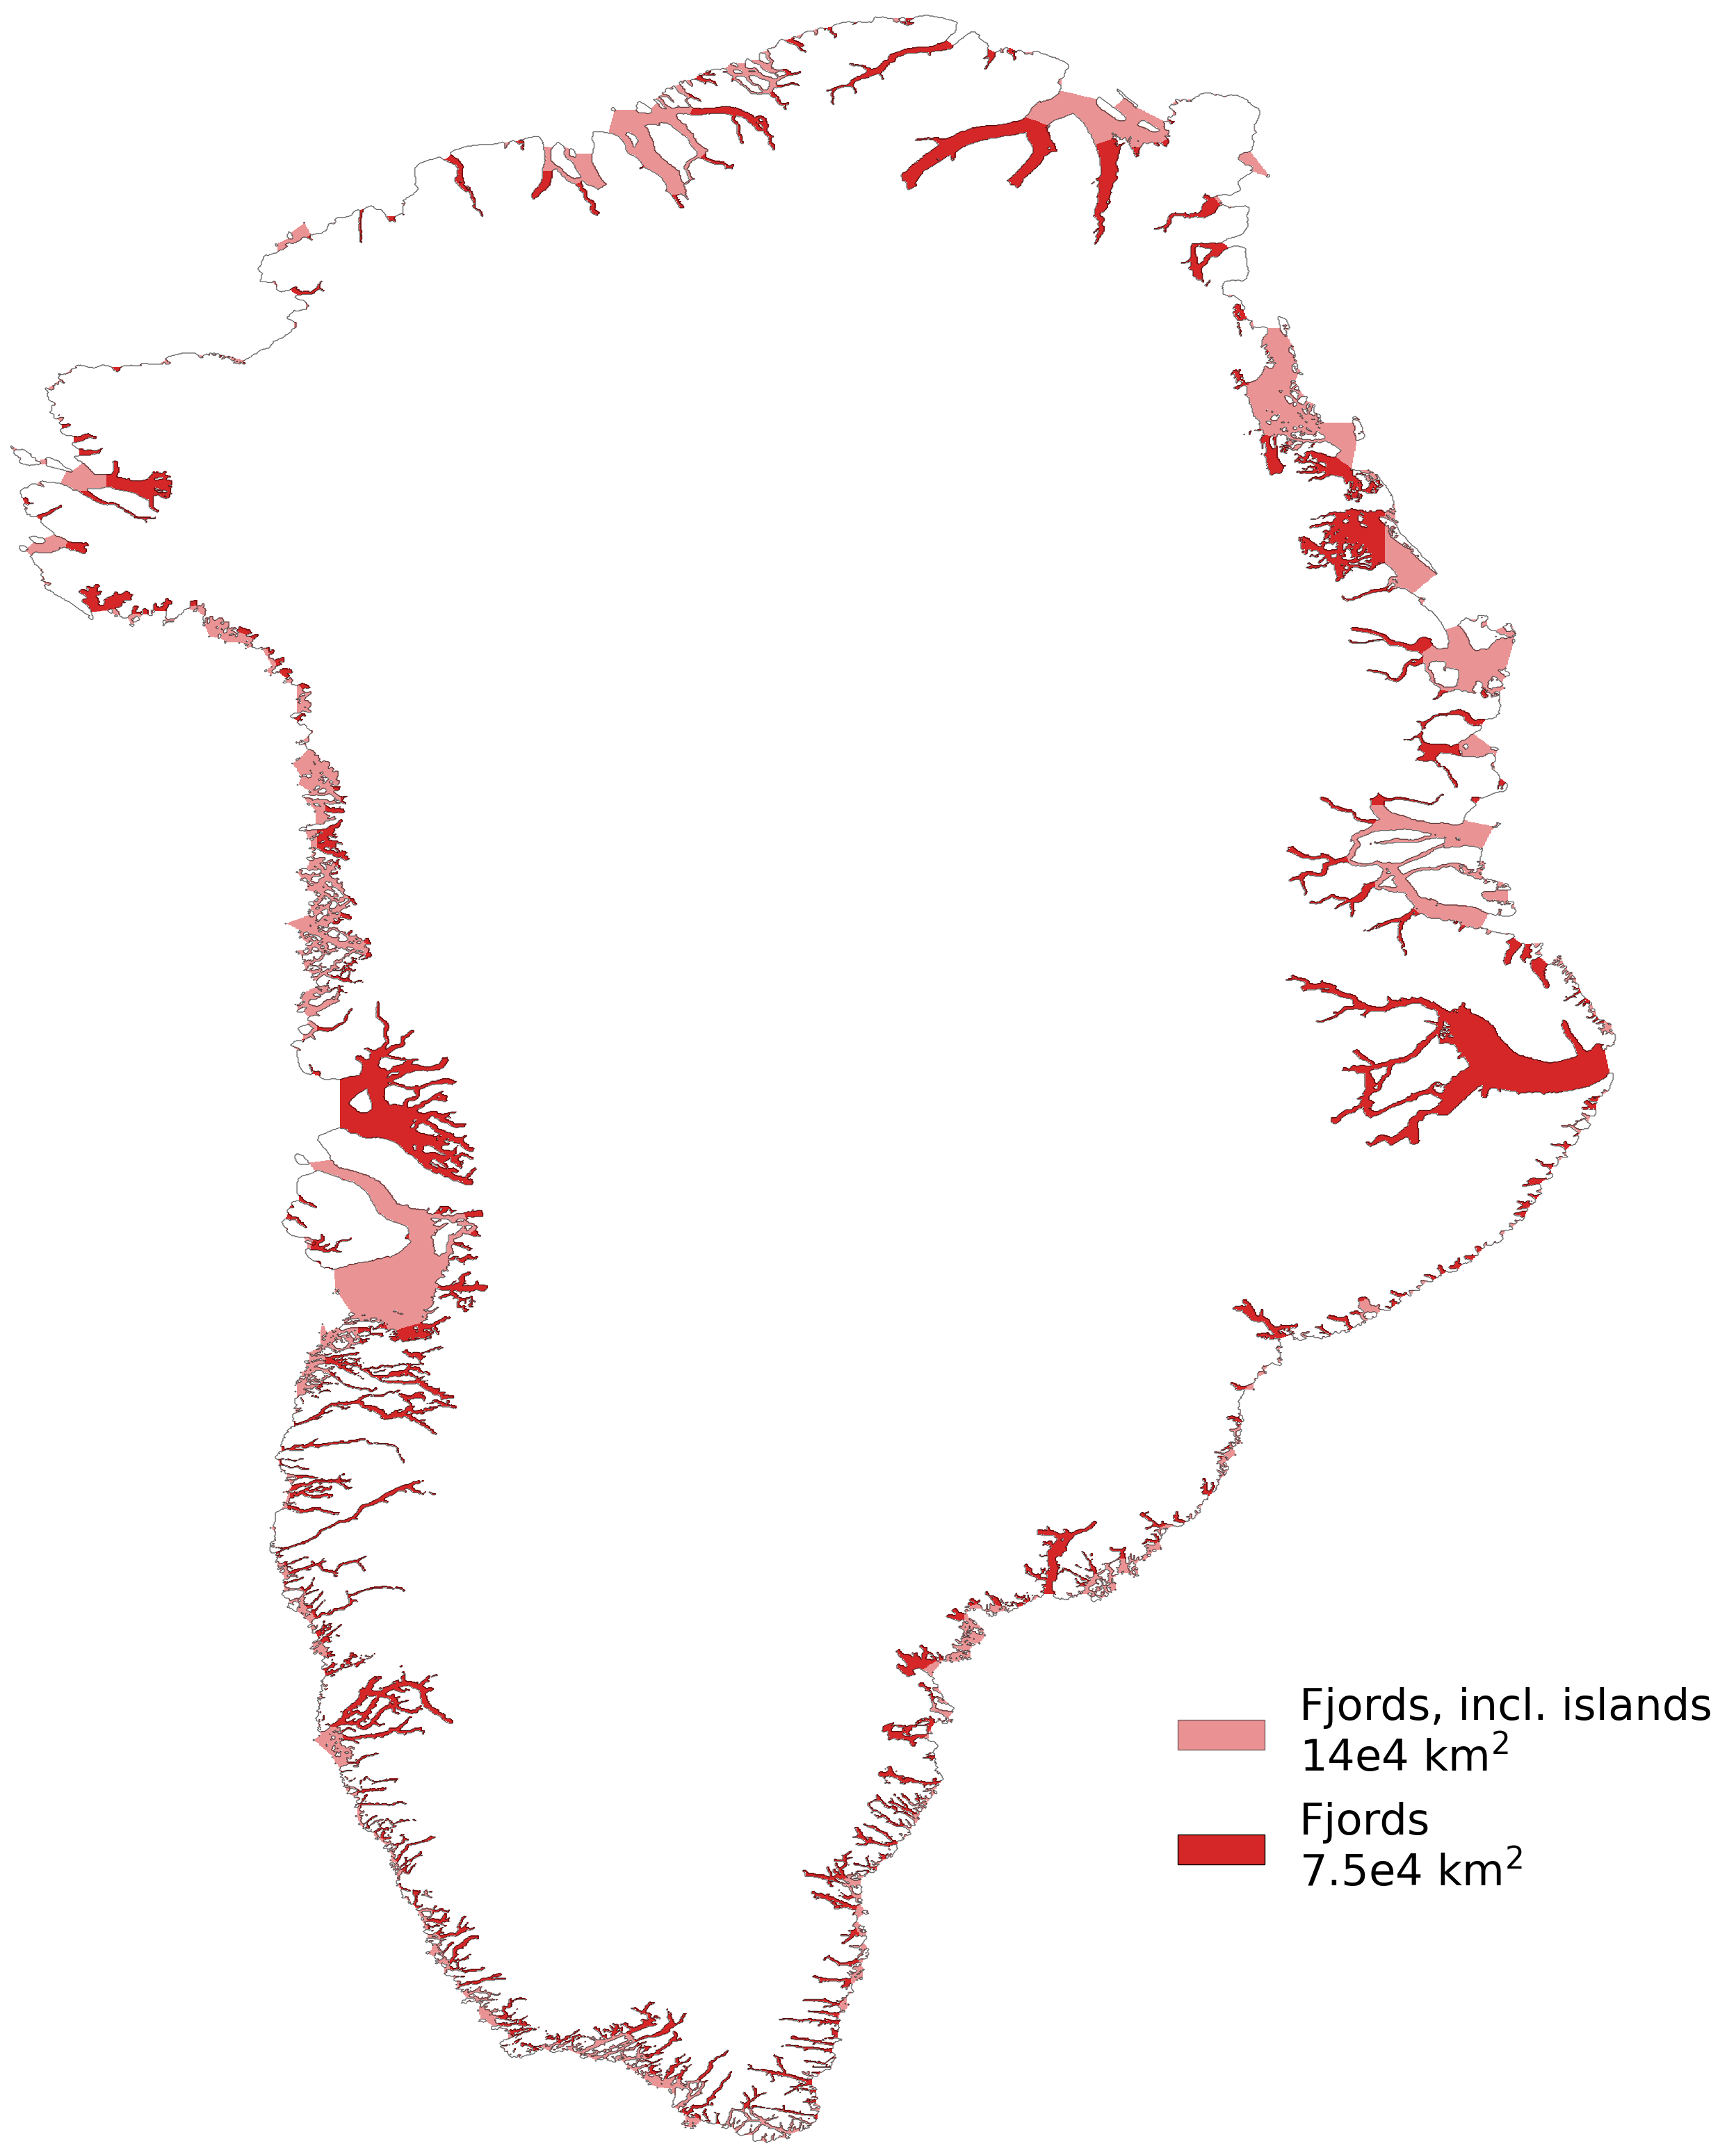

In [122]:
from matplotlib.patches import Patch
from scripts.cmaps import *
fig, ax = plt.subplots(figsize=(30, 40))

ax.pcolorfast(ds_combi['fjords_incl_islands'].where(ds_combi['fjords_incl_islands'] == 1).values,  cmap = cmap_tab_red, alpha=0.5)
ax.pcolorfast(ds_combi['fjords'].where(ds_combi['fjords'] == 1).values,  cmap = cmap_tab_red,)
# ax.pcolorfast(ds_masks1k['LSM'].where(ds_masks1k['LSM'] == 1).values, cmap='ocean')
ax.contour(ds_masks1k['LSM'].values, colors='black', linewidths =0.1)

area_incl = "14e4"
area_excl = "7.5e4"

legend_elements = [
    Patch(facecolor='tab:red', edgecolor='k', alpha=0.5, label='Fjords, incl. islands\n' + area_incl + r' km$^2$'),
    Patch(facecolor='tab:red', edgecolor='k', alpha=1, label='Fjords\n' + area_excl + r' km$^2$'),
]


ax.legend(handles=legend_elements, loc='lower left', fontsize=45, frameon=False, bbox_to_anchor=(0.7, 0.1))
# remove frame
ax.axis('off')

plt.savefig("../../results/figures/method/different_fjord_sizes.png")
